#개인 프로젝트(2주간)

In [ ]:
#라이브러리 설치
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from google.colab import drive
!pip install -U scikit-learn --force-reinstall
!pip install --upgrade numpy matplotlib

In [2]:
import os

# 구글 드라이브 데이터셋 경로
dataset_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/PlantVillage"

# 클래스별 이미지 개수 출력 함수
def count_images_per_class(dataset_path):
    print(f"기준 경로: {dataset_path}\n")
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            img_count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            print(f"클래스 '{class_name}': {img_count}장")

# 실행
count_images_per_class(dataset_path)

기준 경로: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/PlantVillage

클래스 'Potato___Early_blight': 1000장
클래스 'Potato___Late_blight': 1000장
클래스 'Potato___healthy': 152장


In [3]:
# Google Drive 마운트 후 경로 확인
ORIGINAL_DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/PlantVillage"

# 파일이 실제로 있는지 확인
if os.path.exists(ORIGINAL_DATASET_PATH):
    print("데이터셋 폴더가 존재합니다.")
else:
    print("데이터셋 폴더를 찾을 수 없습니다. 경로를 다시 확인하세요.")

# 클래스 폴더 목록 확인
print("클래스 폴더 목록:")
print(os.listdir(ORIGINAL_DATASET_PATH))

# 모든 `.DS_Store` 파일 삭제
for root, dirs, files in os.walk(ORIGINAL_DATASET_PATH):
    for file in files:
        if file == ".DS_Store":
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Deleted: {file_path}")

print(".DS_Store 파일 제거 완료!")

데이터셋 폴더가 존재합니다.
클래스 폴더 목록:
['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
.DS_Store 파일 제거 완료!


In [4]:
# 클래스별 폴더 확인 (파일이 아닌 폴더만 리스트에 추가)
categories = [category for category in os.listdir(ORIGINAL_DATASET_PATH) if os.path.isdir(os.path.join(ORIGINAL_DATASET_PATH, category))]

# 클래스 목록 출력
print(f"클래스 개수: {len(categories)}")
print(f"클래스 목록: {categories}")

클래스 개수: 3
클래스 목록: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


## 데이터셋 생성

In [52]:
import os
import shutil
import random

# 원본 데이터 경로
ORIGINAL_DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/PlantVillage"

# 하나의 분할 대상 경로
SPLIT_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/Split_PlantVillage(8:1:1)"

# 비율 설정
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# 클래스 리스트
categories = [category for category in os.listdir(ORIGINAL_DATASET_PATH) if os.path.isdir(os.path.join(ORIGINAL_DATASET_PATH, category))]
print(f"클래스 개수: {len(categories)}")
print(f"클래스 목록: {categories}")

# 분할 수행
print(f"\n[데이터 분할 경로] {SPLIT_PATH}")
for category in categories:
    class_path = os.path.join(ORIGINAL_DATASET_PATH, category)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    total = len(images)
    train_len = int(total * TRAIN_RATIO)
    val_len = int(total * VAL_RATIO)

    train_imgs = images[:train_len]
    val_imgs = images[train_len:train_len + val_len]
    test_imgs = images[train_len + val_len:]

    for phase, img_list in zip(["train", "val", "test"], [train_imgs, val_imgs, test_imgs]):
        target_dir = os.path.join(SPLIT_PATH, phase, category)
        os.makedirs(target_dir, exist_ok=True)
        for img in img_list:
            shutil.copy2(os.path.join(class_path, img), os.path.join(target_dir, img))

    print(f"[{category}] 복사 완료 → Train {len(train_imgs)} / Val {len(val_imgs)} / Test {len(test_imgs)}")

print("\n데이터 분할 완료: Split_PlantVillage(8:1:1) 폴더에 저장되었습니다.")

클래스 개수: 3
클래스 목록: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

[데이터 분할 경로] /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/Split_PlantVillage(8:1:1)
[Potato___Early_blight] 복사 완료 → Train 800 / Val 100 / Test 100
[Potato___Late_blight] 복사 완료 → Train 800 / Val 100 / Test 100
[Potato___healthy] 복사 완료 → Train 121 / Val 15 / Test 16

데이터 분할 완료: Split_PlantVillage(8:1:1) 폴더에 저장되었습니다.


## 데이터 증강

In [5]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# 데이터셋 경로 설정
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/Split_PlantVillage(8:1:1)"

# 훈련 데이터에 데이터 증강 추가
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # 중심 크롭 후 224x224 변환
    transforms.RandomHorizontalFlip(),  # 좌우 반전
    transforms.RandomRotation(15),  # 15도 이내 랜덤 회전
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)], p=0.5),  # 50% 확률로 색감 변환
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2)),  # 이동, 확대/축소
    transforms.GaussianBlur(kernel_size=3),  # 블러 효과 추가
    transforms.ToTensor(), # Tensor로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 검증 & 테스트 데이터는 원본 유지
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 데이터셋 로드 (훈련 데이터에는 증강 적용)
train_dataset_baseline = datasets.ImageFolder(root=os.path.join(DATASET_PATH, "train"), transform=train_transform)
val_dataset = datasets.ImageFolder(root=os.path.join(DATASET_PATH, "val"), transform=val_test_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(DATASET_PATH, "test"), transform=val_test_transform)

# 데이터 로더 생성
BATCH_SIZE = 32
train_loader_baseline = DataLoader(train_dataset_baseline, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)  # 훈련 데이터는 섞음
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)  # 검증 데이터는 유지
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)  # 테스트 데이터도 유지

# 데이터셋 개수 확인
print(f"훈련 데이터 개수: {len(train_dataset_baseline)}")
print(f"검증 데이터 개수: {len(val_dataset)}")
print(f"테스트 데이터 개수: {len(test_dataset)}")

# 클래스 정보 출력
print(f"클래스 개수: {len(train_dataset_baseline.classes)}")
print(f"클래스 목록: {train_dataset_baseline.classes}")


훈련 데이터 개수: 1721
검증 데이터 개수: 215
테스트 데이터 개수: 216
클래스 개수: 3
클래스 목록: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


### WeightedRandomSampler와 CrossEntropyLoss에 class weight를 적용

In [6]:
import os
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
import numpy as np
from torch import nn

# 데이터셋 경로
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/Split_PlantVillage(8:1:1)"

# 데이터 증강 (훈련용)
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)], p=0.5),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 검증/테스트용
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# 데이터셋 로드
train_dataset_weighted = datasets.ImageFolder(os.path.join(DATASET_PATH, "train"), transform=train_transform)
val_dataset = datasets.ImageFolder(os.path.join(DATASET_PATH, "val"), transform=val_test_transform)
test_dataset = datasets.ImageFolder(os.path.join(DATASET_PATH, "test"), transform=val_test_transform)

# 클래스별 개수 수동 입력
class_counts = [1000, 1000, 152]  # Early, Late, Healthy
class_weights = 1. / torch.tensor(class_counts, dtype=torch.float)
sample_weights = [class_weights[label] for label in train_dataset_weighted.targets]

# WeightedRandomSampler 생성
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

# 데이터로더 생성
BATCH_SIZE = 32
train_loader_weighted = DataLoader(train_dataset_weighted, batch_size=BATCH_SIZE, sampler=sampler, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

# 손실 함수 정의 (class weight 적용)
loss_weights = torch.tensor([1.0, 1.0, 1000 / 152], dtype=torch.float)
criterion = nn.CrossEntropyLoss(weight=loss_weights)

# 데이터셋 개수 확인
print(f"훈련 데이터 개수: {len(train_dataset_weighted)}")
print(f"검증 데이터 개수: {len(val_dataset)}")
print(f"테스트 데이터 개수: {len(test_dataset)}")

# 클래스 정보 출력
print(f"클래스 개수: {len(train_dataset_weighted.classes)}")
print(f"클래스 목록: {train_dataset_weighted.classes}")

훈련 데이터 개수: 1721
검증 데이터 개수: 215
테스트 데이터 개수: 216
클래스 개수: 3
클래스 목록: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [7]:
# 데이터 확인
Split_DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/Split_PlantVillage(8:1:1)"

for phase in ["train", "val", "test"]:
    print(f"{phase} 리펙토링 데이터")
    for category in os.listdir(os.path.join(Split_DATASET_PATH, phase)):
        num_images = len(os.listdir(os.path.join(Split_DATASET_PATH, phase, category)))
        print(f"   - {category}: {num_images} images")

train 리펙토링 데이터
   - Potato___Early_blight: 800 images
   - Potato___Late_blight: 800 images
   - Potato___healthy: 121 images
val 리펙토링 데이터
   - Potato___Early_blight: 100 images
   - Potato___Late_blight: 100 images
   - Potato___healthy: 15 images
test 리펙토링 데이터
   - Potato___Early_blight: 100 images
   - Potato___Late_blight: 100 images
   - Potato___healthy: 16 images


## ResNet50 모델 호출
    - baseline
    - weighted
    

## train_dataset_baseline

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 실험 대상 데이터셋 (baseline 또는 weighted 중 택1)
# 예: train_dataset = train_dataset_baseline 또는 train_dataset_weighted
num_classes = len(train_dataset_baseline.classes)

# 사전 학습된 ResNet50 불러오기
model = models.resnet50(pretrained=True)

# 특징 추출기 고정 (Conv 레이어는 학습 제외)
for param in model.parameters():
    param.requires_grad = False

# 출력층 교체 (감자 병해 클래스 수에 맞게 조정)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 모델을 GPU로 이동
model = model.to(device)

print(model)  # 변경된 모델 구조 확인

# 손실 함수 (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# 옵티마이저 (Fully Connected Layer만 학습)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# 학습률 감소 스케줄러 (매 7 Epoch마다 0.1배 감소)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## 모델 학습 (Training Loop)

	1.	모델을 학습 모드(model.train()) 로 설정
	2.	train_loader에서 배치를 하나씩 불러와서 학습
	3.	손실을 계산하고, optimizer.step()으로 가중치 업데이트
	4.	val_loader를 사용하여 검증
	5.	scheduler.step()을 호출하여 학습률 감소 적용
	6.  WeightedRandomSampler와 CrossEntropyLoss에 class weight를 적용차이 비교

In [9]:
import os
import numpy as np
import torch

best_model_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_Best.pth"

# 얼리 스탑 설정
patience = 5
min_delta = 0.001
best_val_loss = np.inf
counter = 0
EPOCHS = 50

# baseline용 로그 변수
train_losses_baseline = []
val_losses_baseline = []
train_accuracies_baseline = []
val_accuracies_baseline = []

# 평가 함수
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return running_loss / len(dataloader), correct / total * 100

# 학습 루프
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader_baseline:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_baseline)
    train_acc = correct / total * 100
    train_losses_baseline.append(train_loss)
    train_accuracies_baseline.append(train_acc)

    val_loss, val_acc = evaluate(model, val_loader)
    val_losses_baseline.append(val_loss)
    val_accuracies_baseline.append(val_acc)

    current_lr = optimizer.param_groups[0]['lr']

    print(f"Epoch [{epoch+1}/{EPOCHS}]")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print(f"Learning Rate: {current_lr:.6f}")

    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)
        print(f"성능 향상! 모델 저장됨: {best_model_path}")
    else:
        counter += 1
        print(f"개선 없음 (Counter: {counter}/{patience})")

    if counter >= patience:
        print(f"얼리 스탑 발생! {epoch+1} 에포크에서 학습 종료")
        break

    scheduler.step()

Epoch [1/50]
Train Loss: 0.6520 | Train Acc: 73.39%
Val Loss: 0.3842 | Val Acc: 88.84%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_Best.pth
Epoch [2/50]
Train Loss: 0.3791 | Train Acc: 86.05%
Val Loss: 0.2681 | Val Acc: 93.02%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_Best.pth
Epoch [3/50]
Train Loss: 0.3520 | Train Acc: 86.69%
Val Loss: 0.2446 | Val Acc: 93.02%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_Best.pth
Epoch [4/50]
Train Loss: 0.3128 | Train Acc: 88.15%
Val Loss: 0.2116 | Val Acc: 94.88%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_Best.pth
Epoch [5/50]
Train Loss: 0.2989 | Train Acc: 87.

### 모델 저장(가중치 & 전체모델)

In [10]:
# 구글 드라이브 내 모델 저장 경로 설정
SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)"
os.makedirs(SAVE_DIR, exist_ok=True)  # 폴더가 없으면 생성

# 학습이 끝난 후 가장 좋은 모델을 다시 저장 (가중치 & 전체 모델)
torch.save(torch.load(best_model_path), os.path.join(SAVE_DIR, "resnet_model_weights(8:1:1).pt"))
print(f"최종 모델 가중치 저장 완료: {os.path.join(SAVE_DIR, 'resnet_model_weights(8:1:1).pt')}")

torch.save(model, os.path.join(SAVE_DIR, "resnet_model_full(8:1:1).pth"))
print(f"최종 모델 전체 저장 완료: {os.path.join(SAVE_DIR, 'resnet_model_full(8:1:1).pth')}")

최종 모델 가중치 저장 완료: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_model_weights(8:1:1).pt
최종 모델 전체 저장 완료: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_model_full(8:1:1).pth


In [11]:
import pandas as pd

# 저장 경로 지정
CSV_SAVE_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_baseline_log.csv"

# 로그 DataFrame 생성
df = pd.DataFrame({
    "epoch": list(range(1, len(train_losses_baseline) + 1)),
    "train_loss": train_losses_baseline,
    "val_loss": val_losses_baseline,
    "train_accuracy": train_accuracies_baseline,
    "val_accuracy": val_accuracies_baseline
})

# 저장
df.to_csv(CSV_SAVE_PATH, index=False)
print(f"학습 로그 CSV 저장 완료: {CSV_SAVE_PATH}")

학습 로그 CSV 저장 완료: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_baseline_log.csv


## train_dataset_weighted

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 실험 대상 데이터셋 (baseline 또는 weighted 중 택1)
# 예: train_dataset = train_dataset_baseline 또는 train_dataset_weighted
num_classes = len(train_dataset_weighted.classes)

# 사전 학습된 ResNet50 불러오기
model = models.resnet50(pretrained=True)

# 특징 추출기 고정 (Conv 레이어는 학습 제외)
for param in model.parameters():
    param.requires_grad = False

# 출력층 교체 (감자 병해 클래스 수에 맞게 조정)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 모델을 GPU로 이동
model = model.to(device)

print(model)  # 변경된 모델 구조 확인

# 손실 함수 (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# 옵티마이저 (Fully Connected Layer만 학습)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# 학습률 감소 스케줄러 (매 7 Epoch마다 0.1배 감소)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### WeightedRandomSampler와 CrossEntropyLoss에 class weight를 적용 O

In [13]:
import os
import numpy as np
import torch

# 리팩토링된 모델 저장 경로
best_model_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_WeightedSampler_Best.pth"

# 얼리 스탑 설정
patience = 5
min_delta = 0.001
best_val_loss = np.inf
counter = 0
EPOCHS = 50

# 로그 저장용 리스트 (가중치 적용용)
train_losses_weighted = []
val_losses_weighted = []
train_accuracies_weighted = []
val_accuracies_weighted = []

# 평가 함수
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return running_loss / len(dataloader), correct / total * 100

# 학습 루프
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader_weighted:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader_weighted)
    train_acc = correct / total * 100
    train_losses_weighted.append(train_loss)
    train_accuracies_weighted.append(train_acc)

    val_loss, val_acc = evaluate(model, val_loader)
    val_losses_weighted.append(val_loss)
    val_accuracies_weighted.append(val_acc)

    current_lr = optimizer.param_groups[0]['lr']

    print(f"Epoch [{epoch+1}/{EPOCHS}]")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print(f"Learning Rate: {current_lr:.6f}")

    if val_loss < best_val_loss - min_delta:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), best_model_path)
        print(f"성능 향상! 모델 저장됨: {best_model_path}")
    else:
        counter += 1
        print(f"개선 없음 (Counter: {counter}/{patience})")

    if counter >= patience:
        print(f"얼리 스탑 발생! {epoch+1} 에포크에서 학습 종료")
        break

    scheduler.step()

Epoch [1/50]
Train Loss: 0.7452 | Train Acc: 68.22%
Val Loss: 0.4284 | Val Acc: 87.44%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_WeightedSampler_Best.pth
Epoch [2/50]
Train Loss: 0.4114 | Train Acc: 86.23%
Val Loss: 0.2991 | Val Acc: 92.09%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_WeightedSampler_Best.pth
Epoch [3/50]
Train Loss: 0.3476 | Train Acc: 87.97%
Val Loss: 0.2976 | Val Acc: 88.37%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_WeightedSampler_Best.pth
Epoch [4/50]
Train Loss: 0.3120 | Train Acc: 88.38%
Val Loss: 0.2683 | Val Acc: 89.30%
Learning Rate: 0.001000
성능 향상! 모델 저장됨: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/ResNet50_WeightedSampler_Best.pth
Epoch [5/50]
Train Loss: 0.2946 | Train Acc: 89.54%
Val Loss: 0.1987 | Val Acc: 

### 모델 저장(가중치 & 전체모델)

In [14]:
# 구글 드라이브 내 모델 저장 경로 설정
SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)"
os.makedirs(SAVE_DIR, exist_ok=True)  # 폴더가 없으면 생성

# 학습이 끝난 후 가장 좋은 모델을 다시 저장 (가중치 & 전체 모델)
# best_model_path: 리팩토링 모델 저장 경로 (가중치만 저장되어 있음)
torch.save(torch.load(best_model_path), os.path.join(SAVE_DIR, "resnet_weighted_model_weights(8:1:1).pt"))
print(f"최종 모델 가중치 저장 완료: {os.path.join(SAVE_DIR, 'resnet_weighted_model_weights(8:1:1).pt')}")

# 전체 모델 저장 (구조 + 가중치 포함)
torch.save(model, os.path.join(SAVE_DIR, "resnet_weighted_model_full(8:1:1).pth"))
print(f"최종 모델 전체 저장 완료: {os.path.join(SAVE_DIR, 'resnet_weighted_model_full(8:1:1).pth')}")

최종 모델 가중치 저장 완료: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_model_weights(8:1:1).pt
최종 모델 전체 저장 완료: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_model_full(8:1:1).pth


In [15]:
CSV_SAVE_PATH = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_log.csv"

df = pd.DataFrame({
    "epoch": list(range(1, len(train_losses_weighted) + 1)),
    "train_loss": train_losses_weighted,
    "val_loss": val_losses_weighted,
    "train_accuracy": train_accuracies_weighted,
    "val_accuracy": val_accuracies_weighted
})
df.to_csv(CSV_SAVE_PATH, index=False)
print(f"학습 로그 CSV 저장 완료: {CSV_SAVE_PATH}")

학습 로그 CSV 저장 완료: /content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_log.csv


## 모델 시각화

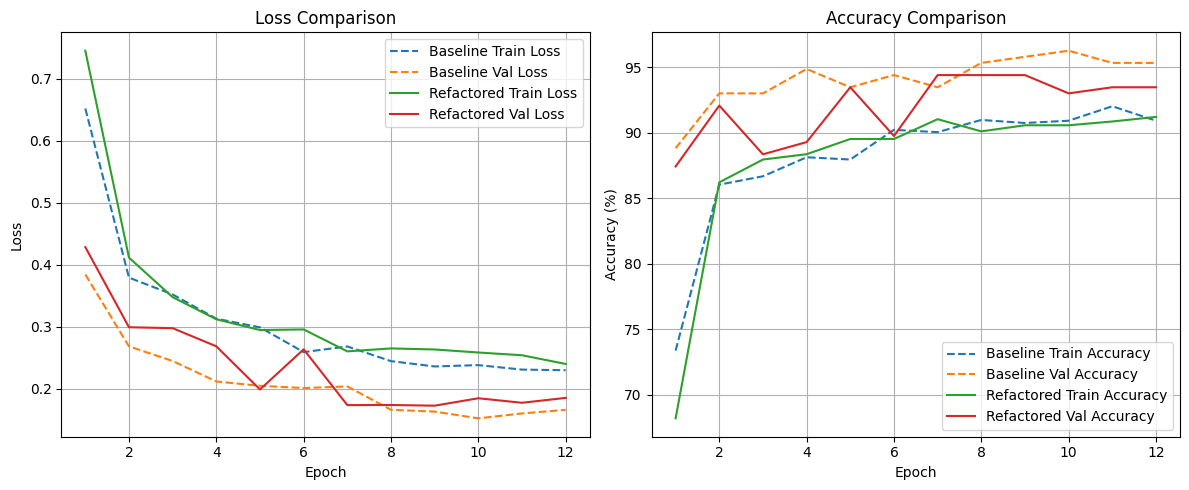

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
baseline_csv_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_baseline_log.csv"
refactored_csv_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_log.csv"

# CSV 불러오기
baseline_df = pd.read_csv(baseline_csv_path)
refactored_df = pd.read_csv(refactored_csv_path)

# 에폭 수를 맞춤 (짧은 쪽 기준으로 자르기)
min_len = min(len(baseline_df), len(refactored_df))
baseline_df = baseline_df.iloc[:min_len]
refactored_df = refactored_df.iloc[:min_len]
epochs = baseline_df["epoch"]

# 시각화
plt.figure(figsize=(12, 5))

# 1. Loss 비교
plt.subplot(1, 2, 1)
plt.plot(epochs, baseline_df["train_loss"], '--', label="Baseline Train Loss")
plt.plot(epochs, baseline_df["val_loss"], '--', label="Baseline Val Loss")
plt.plot(epochs, refactored_df["train_loss"], '-', label="Refactored Train Loss")
plt.plot(epochs, refactored_df["val_loss"], '-', label="Refactored Val Loss")
plt.title("Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2. Accuracy 비교
plt.subplot(1, 2, 2)
plt.plot(epochs, baseline_df["train_accuracy"], '--', label="Baseline Train Accuracy")
plt.plot(epochs, baseline_df["val_accuracy"], '--', label="Baseline Val Accuracy")
plt.plot(epochs, refactored_df["train_accuracy"], '-', label="Refactored Train Accuracy")
plt.plot(epochs, refactored_df["val_accuracy"], '-', label="Refactored Val Accuracy")
plt.title("Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Confusion Matrix

In [17]:
import torch
import torch.nn as nn
from torchvision import models

# 클래스 수 설정
num_classes = 3

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 구조 정의
baseline_model = models.resnet50(pretrained=False)
baseline_model.fc = nn.Linear(baseline_model.fc.in_features, num_classes)

weighted_model = models.resnet50(pretrained=False)
weighted_model.fc = nn.Linear(weighted_model.fc.in_features, num_classes)

# 저장된 가중치 경로
baseline_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_model_weights(8:1:1).pt"
weighted_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_model_weights(8:1:1).pt"

# 가중치 불러오기
baseline_model.load_state_dict(torch.load(baseline_path, map_location=device))
weighted_model.load_state_dict(torch.load(weighted_path, map_location=device))

baseline_model.to(device)
weighted_model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

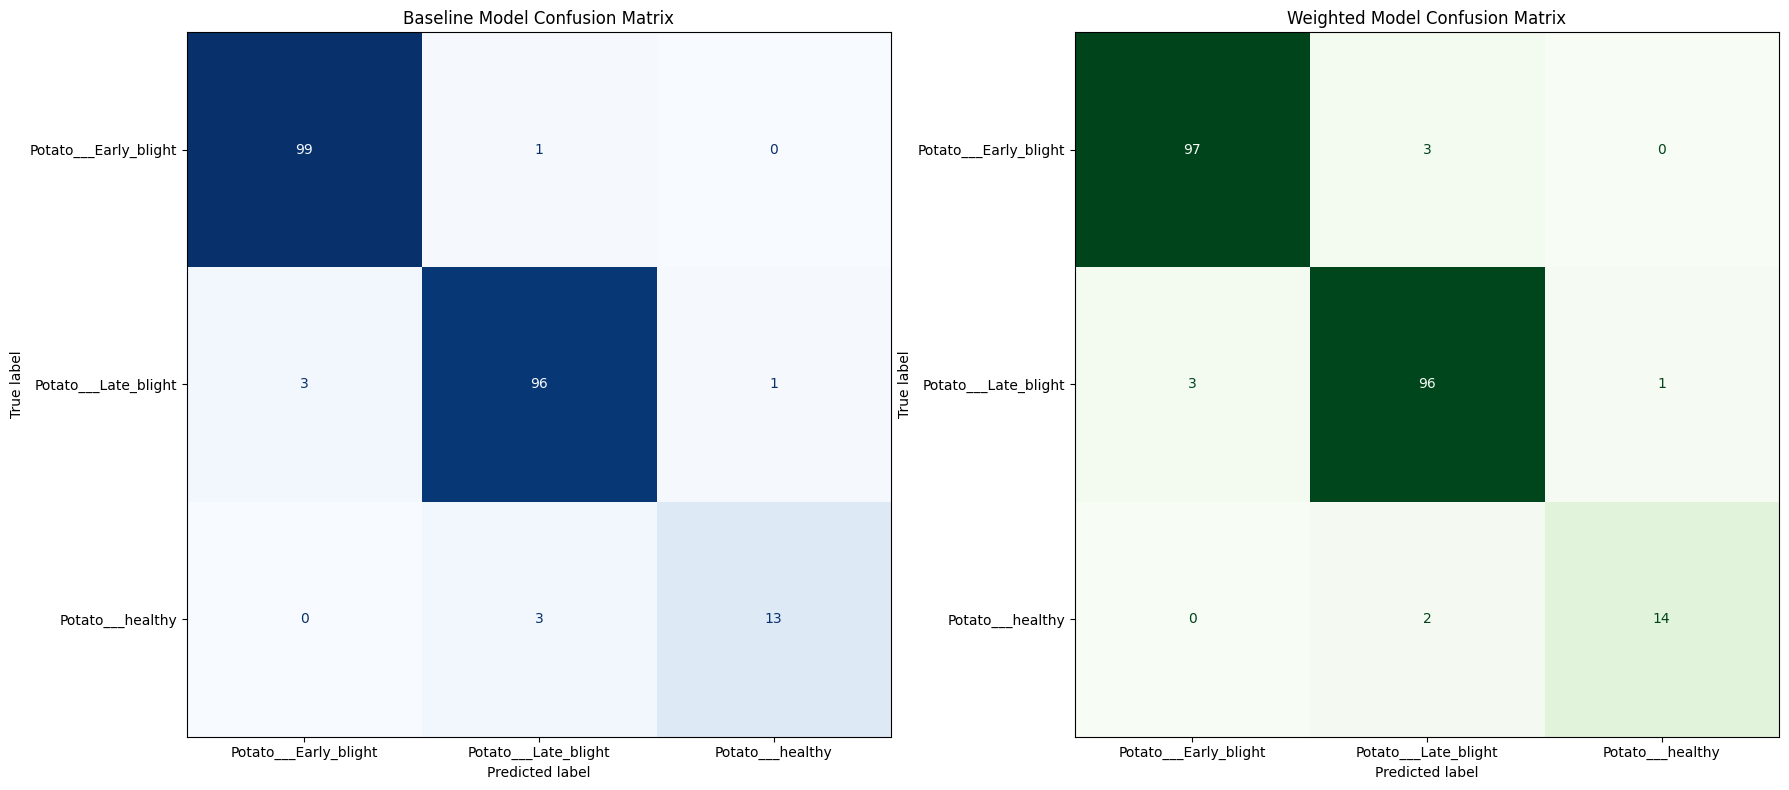

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 예측 함수
def get_predictions(model, dataloader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for images, targets in dataloader:
            images, targets = images.to(device), targets.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            labels.extend(targets.cpu().numpy())
    return preds, labels

# 예측 수행
baseline_preds, baseline_labels = get_predictions(baseline_model, test_loader)
weighted_preds, weighted_labels = get_predictions(weighted_model, test_loader)

# 혼동 행렬 계산
cm_baseline = confusion_matrix(baseline_labels, baseline_preds)
cm_weighted = confusion_matrix(weighted_labels, weighted_preds)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=train_dataset_baseline.classes)
disp1.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Baseline Model Confusion Matrix")
axes[0].grid(False)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_weighted, display_labels=train_dataset_weighted.classes)
disp2.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("Weighted Model Confusion Matrix")
axes[1].grid(False)

plt.tight_layout()
plt.show()

## 클래스별 정확도 출력

In [19]:
from sklearn.metrics import classification_report

# 클래스 이름 (예시로 train_dataset에서 가져옴)
class_names_baseline = train_dataset_baseline.classes  # 예: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
class_names_weighted = train_dataset_weighted.classes  # 예: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# baseline 모델 결과
print("[Baseline 모델 성능 평가]")
print(classification_report(baseline_labels, baseline_preds, target_names=class_names_baseline, digits=4))

# weighted 모델 결과
print("[Weighted Sampler + Loss Weight 모델 성능 평가]")
print(classification_report(weighted_labels, weighted_preds, target_names=class_names_weighted, digits=4))

[Baseline 모델 성능 평가]
                       precision    recall  f1-score   support

Potato___Early_blight     0.9706    0.9900    0.9802       100
 Potato___Late_blight     0.9600    0.9600    0.9600       100
     Potato___healthy     0.9286    0.8125    0.8667        16

             accuracy                         0.9630       216
            macro avg     0.9531    0.9208    0.9356       216
         weighted avg     0.9626    0.9630    0.9624       216

[Weighted Sampler + Loss Weight 모델 성능 평가]
                       precision    recall  f1-score   support

Potato___Early_blight     0.9700    0.9700    0.9700       100
 Potato___Late_blight     0.9505    0.9600    0.9552       100
     Potato___healthy     0.9333    0.8750    0.9032        16

             accuracy                         0.9583       216
            macro avg     0.9513    0.9350    0.9428       216
         weighted avg     0.9583    0.9583    0.9582       216



## 모델 학습 후 Test Accuracy, Test Loss 출력 및 비교

In [21]:
baseline_model_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model(8:1:1)/resnet_model_weights(8:1:1).pt"
refactored_model_path = "/content/drive/MyDrive/Colab Notebooks/[카카오 부트캠프]/[카카오 부트캠프] 개인과제2 폴더/resnet50_Saved_Model_Refactoring(8:1:1)/resnet_weighted_model_weights(8:1:1).pt"

import torchvision.models as models
import torch.nn as nn

# 클래스 수 (예: 3개 클래스)
num_classes = 3

# 모델 정의 (baseline과 동일 구조)
baseline_model = models.resnet50(pretrained=False)
baseline_model.fc = nn.Linear(baseline_model.fc.in_features, num_classes)

refactored_model = models.resnet50(pretrained=False)
refactored_model.fc = nn.Linear(refactored_model.fc.in_features, num_classes)

criterion = nn.CrossEntropyLoss()

loss_weights = torch.tensor([1.0, 1.0, 1000 / 152], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=loss_weights)

def evaluate(model, dataloader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct / total * 100
    return avg_loss, accuracy

# 모델 평가 함수는 이전 evaluate() 그대로 사용

# Baseline 모델
baseline_model.load_state_dict(torch.load(baseline_model_path))
baseline_model.to(device)
baseline_test_loss, baseline_test_acc = evaluate(baseline_model, test_loader, criterion)

# Refactored 모델
refactored_model.load_state_dict(torch.load(refactored_model_path))
refactored_model.to(device)
refactored_test_loss, refactored_test_acc = evaluate(refactored_model, test_loader, criterion)

# 결과 출력
print("=== 최종 테스트 성능 비교 ===")
print(f"Baseline    - Loss: {baseline_test_loss:.4f} | Accuracy: {baseline_test_acc:.2f}%")
print(f"Refactored  - Loss: {refactored_test_loss:.4f} | Accuracy: {refactored_test_acc:.2f}%")

=== 최종 테스트 성능 비교 ===
Baseline    - Loss: 0.1762 | Accuracy: 96.30%
Refactored  - Loss: 0.1901 | Accuracy: 95.83%
